1. Capire con funziona KNeighborsClassifier (anche perché credo che KMeans sia più lento come algoritmo)
2. fare score con classificazioni che abbiamo già determinato nel report 1
3. prova [KNN](https://graph-tool.skewed.de/static/doc/generation.html#graph_tool.generation.generate_knn) graph tool

In [5]:
import numpy as np 
import pandas as pd
from astropy.io import fits
from sklearn.cluster import KMeans as KM
from sklearn.neighbors import KNeighborsClassifier as KNN

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm


plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [7]:
names = ['ID', 'Xcor','Ycor', 'F606','eF606','F814','eF814','chi','sharp']
data = pd.read_csv('../../Report1/Data/Catalog/hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt', names=names, delim_whitespace=True, skiprows=1)

In [8]:
data

,ID,Xcor,Ycor,F606,eF606,F814,eF814,chi,sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720
...,...,...,...,...,...,...,...,...,...
51475,899987,3417.467,10394.319,26.895,0.0783,25.602,0.1050,9.508,1.3140
51476,900088,3435.031,10396.730,23.152,0.0504,22.662,0.0505,8.823,-0.1330
51477,900094,3594.567,10397.340,27.209,0.0815,27.130,0.0900,4.311,0.9355
51478,900176,5155.093,10397.920,28.235,0.0984,26.477,0.0937,6.173,0.3190


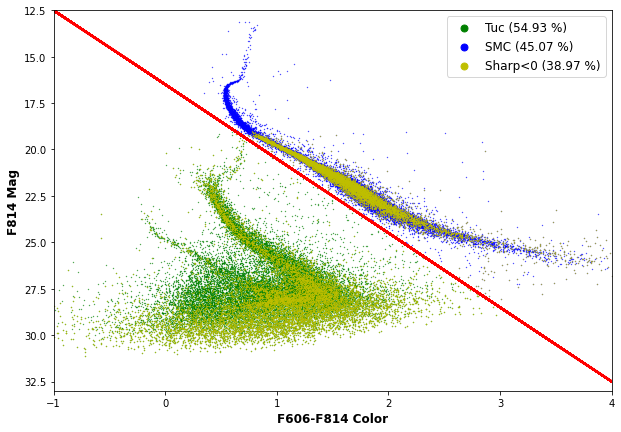

In [18]:
x = data.F606 - data.F814
y = 16.5 + 4. * x
plt.figure(figsize=(10,7))
plt.plot(x, y, '-r')

Tuc = np.where(data.F814 > y)[0]
SMC = np.where(data.F814 < y)[0]
Shar = np.where(data.sharp == 0)[0]
Shar_neg = np.where(data.sharp < 0)[0]
Chi = np.where(data.chi == 0)[0]

perc = np.array([len(Tuc), len(SMC), len(Shar), len(Shar_neg), len(Chi)]) * 100 / len(x)

plt.scatter(x[Tuc], data.loc[Tuc, 'F814'], s=0.1, c='g', label='Tuc ({:.2f} %)'.format(perc[0]))
plt.scatter(x[SMC], data.loc[SMC, 'F814'], s=0.1, c='b', label='SMC ({:.2f} %)'.format(perc[1]))
#plt.scatter(x[Shar], data.loc[Shar, 'F814'], s=0.1, c='k', label='Sharp=0 ({:.2f} %)'.format(perc[2]))
plt.scatter(x[Shar_neg], data.loc[Shar_neg, 'F814'], s=0.1, c='y', label='Sharp<0 ({:.2f} %)'.format(perc[3]))
#plt.scatter(x[Chi], data.loc[Chi, 'F814'], s=0.1, c='m', label='Chi=0 ({:.2f} %)'.format(perc[4]))

plt.xlim(-1, 4)
plt.ylim(33, 12.5)
plt.xlabel('F606-F814 Color')
plt.ylabel('F814 Mag')
plt.legend(markerscale=22);

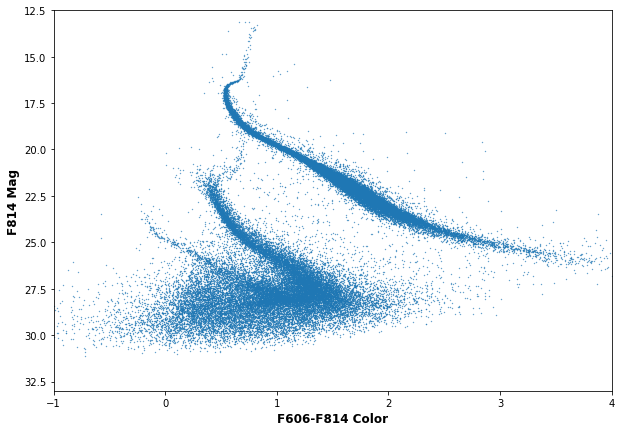

In [21]:
x = data.F606 - data.F814
y = 16.5 + 4. * x
plt.figure(figsize=(10,7))
#plt.plot(x, y, '-r')

plt.scatter(x, data.F814, s=0.1)


plt.xlim(-1, 4)
plt.ylim(33, 12.5)
plt.xlabel('F606-F814 Color')
plt.ylabel('F814 Mag');

# KMeans

In [41]:
X = np.column_stack((data.F606 - data.F814, data.F814))

# fit a K-Means Model with two components
neigh = KM(n_clusters=2, random_state=0)
neigh.fit(X)

data_label = neigh.labels_

#score = neigh.score(test, test_label)
score = neigh.score(X, data_label)
print(score)

-143781.7303133527


In [46]:
data_label_pred = neigh.predict(X)
train_accuracy = np.mean(data_label_pred.ravel() == data_label.ravel()) * 100.
print(train_accuracy)

first = np.where(data_label_pred==0)
firstX = X[first,0]
firstY = X[first,1]
Ax = np.mean(firstX)
Ay = np.mean(firstY)


second = np.where(data_label_pred==1)
secondX = X[second,0]
secondY = X[second,1]
Bx = np.mean(secondX)
By = np.mean(secondY)

err = np.where(data_label_pred != data_label)
errX = X[err,0]
errY = X[err,1]

100.0


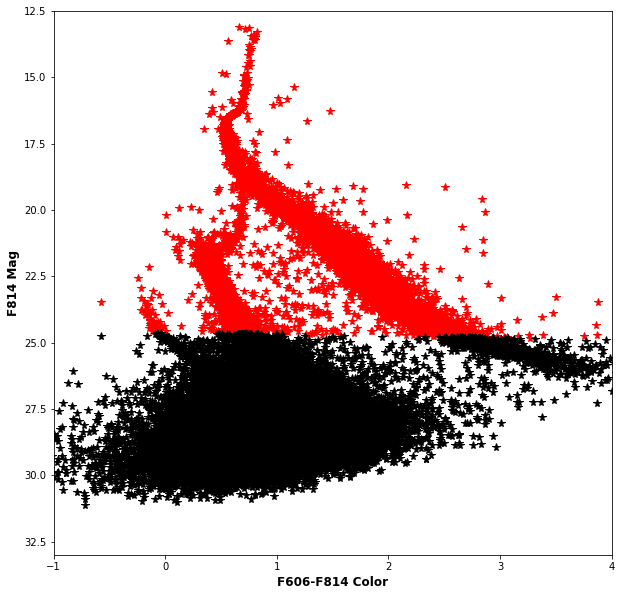

In [52]:
plt.figure(figsize=(10,10))
plt.plot(firstX, firstY, '*r')
plt.scatter(Ax, Ay, s=.1, facecolors='none', edgecolors='r')

plt.plot(secondX, secondY, '*k')
plt.scatter(Bx, By, s=.1, facecolors='none', edgecolors='k')

plt.plot(errX, errY, 'xk', markersize=.1)
plt.xlim(-1, 4)
plt.ylim(33, 12.5)
plt.xlabel('F606-F814 Color')
plt.ylabel('F814 Mag');

# KNeighborsClassifier

In [56]:
data_label=np.zeros((len(X)))

# fit a K-Neighbours Model with two components
neigh = KNN(n_neighbors=2)
neigh.fit(X, data_label)


#score = neigh.score(test, test_label)
#score = neigh.score(X)
#print(score)

KNeighborsClassifier(n_neighbors=2)

100.0


/home/manuel/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/manuel/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


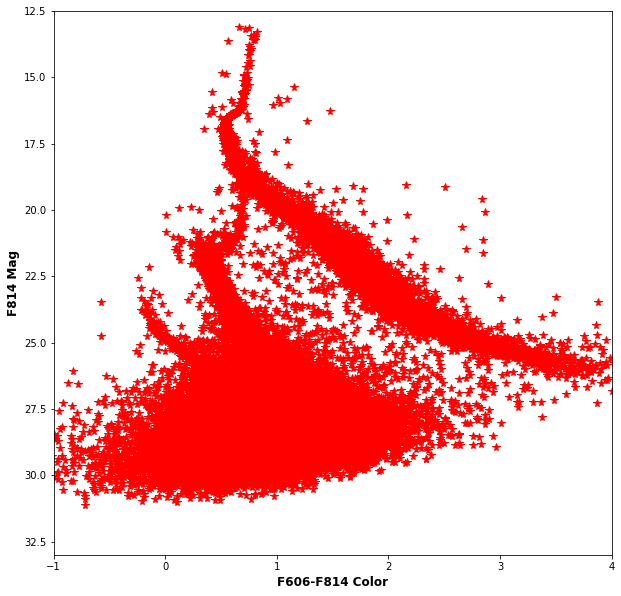

In [58]:
data_label_pred = neigh.predict(X)
train_accuracy = np.mean(data_label_pred.ravel() == data_label.ravel()) * 100.
print(train_accuracy)

first=np.where(data_label_pred==0)
firstX=X[first,0]
firstY=X[first,1]
Ax=np.mean(firstX)
Ay=np.mean(firstY)


second=np.where(data_label_pred==1)
secondX=X[second,0]
secondY=X[second,1]
Bx=np.mean(secondX)
By=np.mean(secondY)

err=np.where(data_label_pred != data_label)
errX=X[err,0]
errY=X[err,1]

plt.figure(figsize=(10,10))
plt.plot(firstX, firstY, '*r')
plt.scatter(Ax, Ay, s=.1, facecolors='none', edgecolors='r')

plt.plot(secondX, secondY, '*k')
plt.scatter(Bx, By, s=.1, facecolors='none', edgecolors='k')

plt.plot(errX, errY, 'xk', markersize=.1)
plt.xlim(-1, 4)
plt.ylim(33, 12.5)
plt.xlabel('F606-F814 Color')
plt.ylabel('F814 Mag');

# Referenze

* K-means [example](https://scipython.com/blog/k-means-clustering-of-exoplanet-data/)